In [1]:
#Imports
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
#Clean data table for penalty graph
data11 =  pd.read_csv('2011plays.csv')
data = data11[["isPenalty", "qtr_time_remain", "quarter"]]
data = data[data["isPenalty"] == True]
quart = []
for i in range(len(data[["quarter"]].values)):
    val = data[["quarter"]].values[i][0]
    quart.append(val.replace(".0", ""))
data["quarters"] = quart
data = data[data.quarters != "OT"]
data["quarters"] = data["quarters"].astype(int)
data = data.dropna()
def get_sec(s):
    hold = []
    for i in range(len(s)):
        entry = str(s.values[i][0])
        l = entry.split(':')
        result = int(l[0]) * 60 + int(l[1])
        if result == np.nan:
            print "yes"
        hold.append(result)
    ret = hold
    return ret
data["qtr_time_remain"] = get_sec(data[["qtr_time_remain"]])
data["time_elapsed"] = data["quarters"]*15.0*60.0 - data["qtr_time_remain"]
data.head()



/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,isPenalty,qtr_time_remain,quarter,quarters,time_elapsed
5,True,763,1.0,1,137
89,True,15,2.0,2,1785
126,True,98,3.0,3,2602
159,True,390,4.0,4,3210
172,True,65,4.0,4,3535


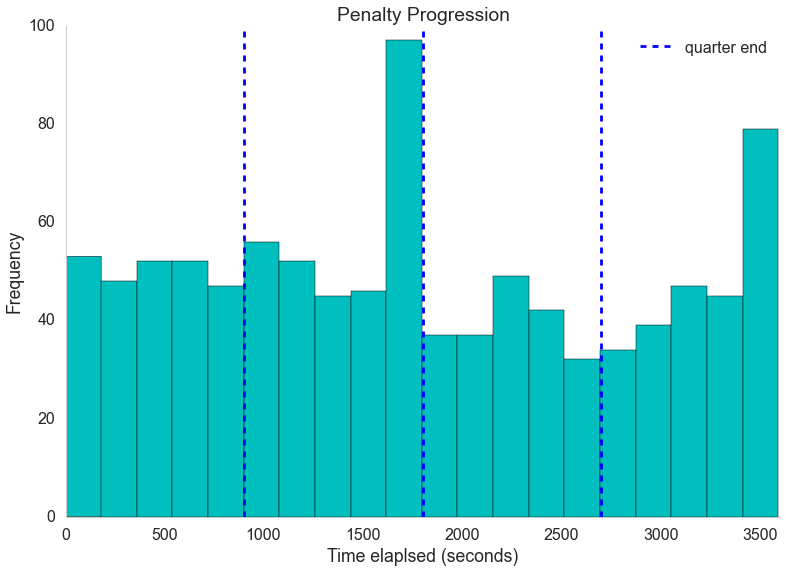

In [3]:
#Plot of penalty graph
plt.hist(data["time_elapsed"].values, bins=20, color="c")
plt.title("Penalty Progression")
plt.xlabel("Time elaplsed (seconds)")
plt.ylabel("Frequency")
plt.xlim(0,3600)
plt.axvline(15*60, color="b", label = "quarter end", ls = '--')
plt.axvline(30*60, color="b", ls = '--')
plt.axvline(45*60, color="b", ls = '--')
plt.legend()
plt.grid(False)
sns.despine()

In [4]:
data11.head(2)

,bsID,challengeUpheld,challenged,challenger,detail,down,exp_pts_after,exp_pts_before,forcer,fumbRecFieldside,fumbRecYdLine,fumbRetYds,fumbler,home_wp,intRetYds,intYdLine,interceptor,isComplete,isPass,isPenalty,isRun,isTD,isTimeout,isTwoPoint,lateral,location,passLoc,passer,pbp_score_aw,pbp_score_hm,penDeclined,penOn,penYds,penalty,qtr_time_remain,quarter,recoverer,rushDir,rusher,sackYds,sacker1,sacker2,tackler1,tackler2,target,timeoutNum,timeoutTeam,twoPointSuccess,yds,yds_to_go
0,201109110ram,False,False,NaN,"brownjos01 kicks off 71 yards, returned by Lew...",NaN,-0.35,0.00,NaN,NaN,0,0,NaN,0.0,False,False,False,False,False,False,True,False,False,NaN,False,RAM 35,NaN,NaN,0,0,False,NaN,0,NaN,NaN,1.0,NaN,NaN,brownjos01,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,201109110ram,False,False,NaN,VickMi00 left end for 9 yards (tackle by LaurJ...,1,0.42,-0.35,NaN,NaN,0,0,NaN,37.1,False,False,False,False,False,False,True,False,False,NaN,False,PHI 12,NaN,NaN,0,0,False,NaN,0,NaN,14:56,1.0,NaN,LE,VickMi00,NaN,NaN,False,LaurJa99,NaN,NaN,NaN,NaN,NaN,9,10


In [5]:
data11.columns

Index([u'bsID', u'challengeUpheld', u'challenged', u'challenger', u'detail', u'down', u'exp_pts_after', u'exp_pts_before', u'forcer', u'fumbRecFieldside', u'fumbRecYdLine', u'fumbRetYds', u'fumbler', u'home_wp', u'intRetYds', u'intYdLine', u'interceptor', u'isComplete', u'isPass', u'isPenalty', u'isRun', u'isTD', u'isTimeout', u'isTwoPoint', u'lateral', u'location', u'passLoc', u'passer', u'pbp_score_aw', u'pbp_score_hm', u'penDeclined', u'penOn', u'penYds', u'penalty', u'qtr_time_remain',
       u'quarter', u'recoverer', u'rushDir', u'rusher', u'sackYds', u'sacker1', u'sacker2', u'tackler1', u'tackler2', u'target', u'timeoutNum', u'timeoutTeam', u'twoPointSuccess', u'yds', u'yds_to_go'],
      dtype='object')

In [6]:
inputs = ["bsID", "down", "location", "pbp_score_aw", "pbp_score_hm", "qtr_time_remain", "quarter", "timeoutNum", "timeoutTeam", "yds_to_go"]

In [7]:
dftest = data11[["down", "location", "isPass","isComplete", "isRun", "passLoc", "rushDir", "qtr_time_remain", "quarter", "rusher", "yds_to_go", "passer", "pbp_score_aw", "pbp_score_hm", "timeoutNum", "timeoutTeam"]]
dftest.head(2)

,down,location,isPass,isComplete,isRun,passLoc,rushDir,qtr_time_remain,quarter,rusher,yds_to_go,passer,pbp_score_aw,pbp_score_hm,timeoutNum,timeoutTeam
0,NaN,RAM 35,False,False,True,NaN,NaN,NaN,1.0,brownjos01,NaN,NaN,0,0,NaN,NaN
1,1,PHI 12,False,False,True,NaN,LE,14:56,1.0,VickMi00,10,NaN,0,0,NaN,NaN


In [8]:
dftest[dftest.isRun == True].rushDir.unique()

array([nan, 'LE', 'RE', 'M', 'LT', 'RT', 'RG', 'LG'], dtype=object)

In [9]:
def isPassSM(df):
    if df["isPass"]==True and df["passLoc"] == "SM":
        num = 1
    else:
        num = 0
    return num

def isPassSL(df):
    if df["isPass"]==True and df["passLoc"] == "SL":
        num = 1
    else:
        num = 0
    return num

def isPassSR(df):
    if df["isPass"]==True and df["passLoc"] == "SR":
        num = 1
    else:
        num = 0
    return num

def isPassDM(df):
    if df["isPass"]==True and df["passLoc"] == "DM":
        num = 1
    else:
        num = 0
    return num

def isPassDR(df):
    if df["isPass"]==True and df["passLoc"] == "DR":
        num = 1
    else:
        num = 0
    return num

def isPassDL(df):
    if df["isPass"]==True and df["passLoc"] == "DL":
        num = 1
    else:
        num = 0
    return num

def isRunLE(df):
    if df["isRun"]==True and df["rushDir"] == "LE":
        num = 1
    else:
        num = 0
    return num

def isRunRE(df):
    if df["isRun"]==True and df["rushDir"] == "RE":
        num = 1
    else:
        num = 0
    return num

def isRunM(df):
    if df["isRun"]==True and df["rushDir"] == "M":
        num = 1
    else:
        num = 0
    return num

def isRunLT(df):
    if df["isRun"]==True and df["rushDir"] == "LT":
        num = 1
    else:
        num = 0
    return num

def isRunRT(df):
    if df["isRun"]==True and df["rushDir"] == "RT":
        num = 1
    else:
        num = 0
    return num

def isRunRG(df):
    if df["isRun"]==True and df["rushDir"] == "RG":
        num = 1
    else:
        num = 0
    return num

def isRunLG(df):
    if df["isRun"]==True and df["rushDir"] == "LG":
        num = 1
    else:
        num = 0
    return num

#Create Pass Columns
dftest["isPassSM"] = dftest.apply(isPassSM, axis=1)
dftest["isPassSL"] = dftest.apply(isPassSL, axis=1)
dftest["isPassSR"] = dftest.apply(isPassSR, axis=1)
dftest["isPassDM"] = dftest.apply(isPassDM, axis=1)
dftest["isPassDL"] = dftest.apply(isPassDL, axis=1)
dftest["isPassDR"] = dftest.apply(isPassDR, axis=1)
dftest["isPassS"] = dftest["isPassSM"] + dftest["isPassSL"] + dftest["isPassSR"]
dftest["isPassD"] = dftest["isPassDM"] + dftest["isPassDL"] + dftest["isPassDR"]

#Create Run Columns
dftest["isRunLE"] = dftest.apply(isRunLE, axis=1)
dftest["isRunRE"] = dftest.apply(isRunRE, axis=1)
dftest["isRunRT"] = dftest.apply(isRunRT, axis=1)
dftest["isRunLT"] = dftest.apply(isRunLT, axis=1)
dftest["isRunRG"] = dftest.apply(isRunRG, axis=1)
dftest["isRunLG"] = dftest.apply(isRunLG, axis=1)
dftest["isRunM"] = dftest.apply(isRunM, axis=1)
dftest.head()



/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http

,down,location,isPass,isComplete,isRun,passLoc,rushDir,qtr_time_remain,quarter,rusher,yds_to_go,passer,pbp_score_aw,pbp_score_hm,timeoutNum,timeoutTeam,isPassSM,isPassSL,isPassSR,isPassDM,isPassDL,isPassDR,isPassS,isPassD,isRunLE,isRunRE,isRunRT,isRunLT,isRunRG,isRunLG,isRunM
0,NaN,RAM 35,False,False,True,NaN,NaN,NaN,1.0,brownjos01,NaN,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,PHI 12,False,False,True,NaN,LE,14:56,1.0,VickMi00,10,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,PHI 21,False,False,True,NaN,NaN,14:20,1.0,VickMi00,1,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,PHI 21,False,False,True,NaN,RE,14:15,1.0,McCoLe01,1,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,PHI 28,False,False,True,NaN,RE,13:36,1.0,McCoLe01,10,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [10]:
len(dftest[dftest["isComplete"]==True]) +  len(dftest[dftest.isRun==True][dftest.rushDir != np.nan])

/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


39716

In [11]:
n = float(len(dftest.passLoc.dropna()) +  len(dftest["rushDir"].dropna()))
res_dict = {
    "isPassSL": dftest.isPassSL.sum()/n,
    "isPassSM": dftest.isPassSM.sum()/n,
    "isPassSR": dftest.isPassSR.sum()/n,
    "isPassDL": dftest.isPassDL.sum()/n,
    "isPassDM": dftest.isPassDM.sum()/n,
    "isPassDR": dftest.isPassDR.sum()/n,
    "isRunLE": dftest.isRunLE.sum()/n,
    "isRunLT": dftest.isRunLT.sum()/n,
    "isRunLG": dftest.isRunLG.sum()/n,
    "isRunM": dftest.isRunM.sum()/n,
    "isRunRG": dftest.isRunRG.sum()/n,
    "isRunRT": dftest.isRunRT.sum()/n,
    "isRunRE": dftest.isRunRE.sum()/n
    }


In [12]:
res_dict

{'isPassDL': 0.021480100510658993,
 'isPassDM': 0.020264245764772634,
 'isPassDR': 0.020547945205479451,
 'isPassSL': 0.13370349355596986,
 'isPassSM': 0.094269271297722293,
 'isPassSR': 0.15798005998216746,
 'isRunLE': 0.06452135851503607,
 'isRunLG': 0.061076436735024719,
 'isRunLT': 0.076436735024722383,
 'isRunM': 0.14610521196401069,
 'isRunRE': 0.066588311583042875,
 'isRunRG': 0.06452135851503607,
 'isRunRT': 0.072505471346356487}

In [13]:
np.array(res_dict.values()).sum()

1.0

In [14]:
dfinp = data11[inputs]
dfinp.head()

,bsID,down,location,pbp_score_aw,pbp_score_hm,qtr_time_remain,quarter,timeoutNum,timeoutTeam,yds_to_go
0,201109110ram,NaN,RAM 35,0,0,NaN,1.0,NaN,NaN,NaN
1,201109110ram,1,PHI 12,0,0,14:56,1.0,NaN,NaN,10
2,201109110ram,2,PHI 21,0,0,14:20,1.0,NaN,NaN,1
3,201109110ram,3,PHI 21,0,0,14:15,1.0,NaN,NaN,1
4,201109110ram,1,PHI 28,0,0,13:36,1.0,NaN,NaN,10


In [15]:
dfinp.bsID[5][-3:].upper()

'RAM'

In [16]:
def find_home(df):
    name = dfinp.bsID[5][-3:].upper()
    return name

dfinp["home_team"] = dfinp.apply(find_home, axis=1)
dfinp.head()

/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,bsID,down,location,pbp_score_aw,pbp_score_hm,qtr_time_remain,quarter,timeoutNum,timeoutTeam,yds_to_go,home_team
0,201109110ram,NaN,RAM 35,0,0,NaN,1.0,NaN,NaN,NaN,RAM
1,201109110ram,1,PHI 12,0,0,14:56,1.0,NaN,NaN,10,RAM
2,201109110ram,2,PHI 21,0,0,14:20,1.0,NaN,NaN,1,RAM
3,201109110ram,3,PHI 21,0,0,14:15,1.0,NaN,NaN,1,RAM
4,201109110ram,1,PHI 28,0,0,13:36,1.0,NaN,NaN,10,RAM


In [17]:
dfinp.location[0][:3] == dfinp.bsID[5][-3:].upper()

True